In [1]:
from fastai.text import *
from fastai.datasets import *
from pathlib import Path
from fastai.imports import torch
from fastai.metrics import fbeta, accuracy
import sklearn.metrics
import matplotlib as plt

import altair as alt
import numpy as np
import pandas as pd
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
torch.cuda.set_device(3)

In [5]:
torch.__version__

'1.0.0.dev20181022'

In [6]:
EX_PA = Path('/mnt/data/group07/johannes/socc_proc/')

In [7]:
EX_PA

PosixPath('/mnt/data/group07/johannes/socc_proc')

In [8]:
# Language model data
data_lm = TextLMDataBunch.from_csv(EX_PA)
# Classifier model data
data_clas = TextClasDataBunch.from_csv(EX_PA, vocab=data_lm.train_ds.vocab, bs=33)

In [7]:
# download_wt103_model()

In [11]:
while True:
    learn = RNNLearner.language_model(data_lm, pretrained_fnames=['lstm_wt103', 'itos_wt103'], drop_mult=0.2)
    learn.fit_one_cycle(1, 1e-2)
    learn.unfreeze()
    learn.fit_one_cycle(5, 1e-3)
    if learn.recorder.val_losses[-1] < 3.95:
        break

Total time: 00:01
epoch  train loss  valid loss  accuracy
0      4.613883    4.182265    0.230441  (00:01)



Total time: 00:07
epoch  train loss  valid loss  accuracy
0      4.340155    4.063331    0.247377  (00:01)
1      4.217490    3.995572    0.255580  (00:01)
2      4.097885    3.951732    0.257157  (00:01)
3      3.996431    3.961541    0.258086  (00:01)
4      3.921145    3.954485    0.255639  (00:01)



Total time: 00:00
epoch  train loss  valid loss  accuracy
0      4.625697    4.184932    0.232019  (00:00)



Total time: 00:07
epoch  train loss  valid loss  accuracy
0      4.357559    4.065492    0.247909  (00:01)
1      4.229837    3.992138    0.257368  (00:01)
2      4.110126    3.958826    0.253906  (00:01)
3      4.005774    3.967314    0.256387  (00:01)
4      3.937200    3.956513    0.255445  (00:01)



Total time: 00:01
epoch  train loss  valid loss  accuracy
0      4.652763    4.184652    0.231752  (00:01)



Total time: 00:07
epoch  train loss  valid loss  accuracy
0      4.362790    4.062035    0.246767  (00:01)
1      4.234261    3.983663    0.254220  (00:01)
2      4.119071    3.956114    0.257020  (00:01)
3      4.013056    3.955795    0.256314  (00:01)
4      3.938262    3.948457    0.257478  (00:01)



In [126]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

Total time: 00:01
epoch  train loss  valid loss  accuracy
0      4.286994    4.041078    0.253327  (00:01)



In [12]:
learn.save_encoder(EX_PA/'ft_enc')

In [14]:
learn = RNNLearner.classifier(data_clas, drop_mult=0.2)
learn.metrics=[accuracy, f1]
learn.load_encoder(EX_PA/'ft_enc')

In [16]:
while True:
    learn = RNNLearner.classifier(data_clas, drop_mult=0.2)
    learn.metrics=[accuracy, f1]
    learn.load_encoder(EX_PA/'ft_enc')
    learn.fit_one_cycle(1, 1e-3)
    if learn.recorder.metrics[0][0] > 0.79:
        break

/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.672988    0.687150    0.538462  0.474252  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.618176    0.635225    0.636364  0.527856  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.702949    0.580230    0.720280  0.533256  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.664590    0.737834    0.552448  0.439406  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.682936    0.634990    0.580420  0.470426  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.717850    0.662812    0.538462  0.395320  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.693937    0.603013    0.713287  0.544059  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.709698    0.800466    0.426573  0.299630  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.708061    0.556203    0.783217  0.580032  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.709289    0.608073    0.699301  0.479843  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.696110    0.599290    0.713287  0.524736  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.677985    0.667088    0.573427  0.481308  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.597907    0.665976    0.622378  0.524791  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.681494    0.603764    0.727273  0.547378  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.722310    0.741752    0.433566  0.360056  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.699387    0.619911    0.671329  0.514704  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.658065    0.793185    0.475524  0.392189  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.684682    0.661272    0.629371  0.545612  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.614870    0.611817    0.622378  0.506697  (00:04)



Total time: 00:04
epoch  train loss  valid loss  accuracy  f1      
0      0.651714    0.493351    0.818182  0.576352  (00:04)



/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [57]:
learn.recorder.metrics

[[0.54545456, 0.4650841]]

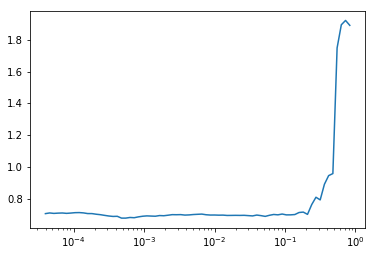

In [76]:
learn.lr_find()
learn.recorder.plot()

In [44]:
while True:
    learn = RNNLearner.classifier(data_clas, drop_mult=0.2)
    learn.load('awsome')
    learn.freeze_to(-2)
    learn.fit_one_cycle(1, slice(5e-5/2., 5e-4))
#     learn.fit_one_cycle(1, slice(5e-6/2., 5e-3))
    if learn.recorder.metrics[-1][0] > 0.83:
        break

Total time: 00:05
epoch  train loss  valid loss  accuracy
0      0.626872    0.529463    0.783217  (00:05)



Total time: 00:05
epoch  train loss  valid loss  accuracy
0      0.644058    0.657343    0.601399  (00:05)



Total time: 00:05
epoch  train loss  valid loss  accuracy
0      0.608156    0.527322    0.790210  (00:05)



Total time: 00:05
epoch  train loss  valid loss  accuracy
0      0.598237    0.528688    0.720280  (00:05)



Total time: 00:05
epoch  train loss  valid loss  accuracy
0      0.621203    0.532794    0.769231  (00:05)



Total time: 00:05
epoch  train loss  valid loss  accuracy
0      0.602589    0.566391    0.657343  (00:05)



Total time: 00:05
epoch  train loss  valid loss  accuracy
0      0.636694    0.612290    0.622378  (00:05)



Total time: 00:05
epoch  train loss  valid loss  accuracy
0      0.639744    0.530114    0.755245  (00:05)



Total time: 00:04
epoch  train loss  valid loss  accuracy
0      0.694150    0.531986    0.720280  (00:04)



Total time: 00:05
epoch  train loss  valid loss  accuracy
0      0.631161    0.660021    0.587413  (00:05)



Total time: 00:05
epoch  train loss  valid loss  accuracy
0      0.653128    0.511074    0.874126  (00:05)



In [45]:
# learn.save('awsome2')

In [13]:
while True:
    learn = RNNLearner.classifier(data_clas, drop_mult=0.2)
    learn.load('awsome2') 
    learn.unfreeze()
    learn.fit_one_cycle(3, slice(2e-8/100, 2e-8))

Total time: 00:23
epoch  train loss  valid loss  accuracy
0      0.626142    0.562448    0.748252  (00:07)
1      0.635982    0.537606    0.762238  (00:07)
2      0.635376    0.519021    0.853147  (00:07)



Total time: 00:23
epoch  train loss  valid loss  accuracy
0      0.614631    0.535931    0.790210  (00:08)
1      0.643080    0.554213    0.741259  (00:07)
2      0.638746    0.530767    0.846154  (00:07)



Total time: 00:22
epoch  train loss  valid loss  accuracy
0      0.667729    0.549283    0.734266  (00:07)
1      0.633646    0.529739    0.811189  (00:07)
2      0.611027    0.533947    0.846154  (00:08)



Total time: 00:22
epoch  train loss  valid loss  accuracy
0      0.661299    0.548696    0.713287  (00:07)
1      0.641108    0.518390    0.860140  (00:07)
2      0.644903    0.508240    0.832168  (00:07)



Total time: 00:22
epoch  train loss  valid loss  accuracy
0      0.648224    0.526253    0.839161  (00:07)
1      0.645510    0.561803    0.713287  (00:07)
2      0.639350    0.523966    0.825175  (00:07)



Total time: 00:24
epoch  train loss  valid loss  accuracy
0      0.644250    0.546490    0.741259  (00:08)
1      0.638748    0.531136    0.832168  (00:08)
2      0.630356    0.544142    0.748252  (00:07)



Total time: 00:23
epoch  train loss  valid loss  accuracy
0      0.661169    0.528968    0.818182  (00:07)
1      0.663829    0.551732    0.664336  (00:07)
2      0.631056    0.505384    0.825175  (00:08)



Total time: 00:23
epoch  train loss  valid loss  accuracy
0      0.662843    0.556121    0.727273  (00:07)
1      0.618727    0.524829    0.839161  (00:08)
2      0.602637    0.519793    0.853147  (00:08)



Total time: 00:23
epoch  train loss  valid loss  accuracy
0      0.635963    0.513793    0.832168  (00:07)
1      0.664702    0.578567    0.629371  (00:06)
2      0.626193    0.520712    0.825175  (00:08)



Total time: 00:24
epoch  train loss  valid loss  accuracy
0      0.625775    0.527897    0.839161  (00:08)
1      0.625973    0.520373    0.804196  (00:07)
2      0.627407    0.548153    0.741259  (00:08)



Total time: 00:23
epoch  train loss  valid loss  accuracy
0      0.650771    0.532285    0.797203  (00:07)
1      0.638053    0.540706    0.804196  (00:07)
2      0.627084    0.534325    0.825175  (00:07)



Total time: 00:23
epoch  train loss  valid loss  accuracy
0      0.622212    0.527968    0.832168  (00:07)
1      0.632418    0.536577    0.804196  (00:07)
2      0.612856    0.529729    0.818182  (00:08)



Total time: 00:23
epoch  train loss  valid loss  accuracy
0      0.624801    0.510901    0.818182  (00:08)
1      0.629540    0.510331    0.818182  (00:08)
2      0.640670    0.548938    0.769231  (00:07)



Total time: 00:23
epoch  train loss  valid loss  accuracy
0      0.653613    0.524400    0.846154  (00:07)
1      0.622964    0.537765    0.790210  (00:08)
2      0.654854    0.508856    0.825175  (00:07)



Total time: 00:23
epoch  train loss  valid loss  accuracy
0      0.618006    0.523607    0.825175  (00:07)
1      0.613165    0.516950    0.825175  (00:07)
2      0.630458    0.521345    0.839161  (00:07)



Total time: 00:23
epoch  train loss  valid loss  accuracy
0      0.604508    0.510314    0.818182  (00:08)
1      0.665785    0.593464    0.643357  (00:06)
2      0.625609    0.535542    0.797203  (00:08)



KeyboardInterrupt: 

In [ ]:
# def accuracy(input, targs):
#     "Compute accuracy with `targs` when `input` is bs * n_classes."
#     n = targs.shape[0]
#     input = input.argmax(dim=1).view(n,-1)
#     targs = targs.view(n,-1)
#     print(targs)
#     return 1337

In [17]:
# learn.save('awsome')

In [12]:
def f1(preds, y_true):
    _, y_pred = preds.max(dim=1)
    cpu_res = sklearn.metrics.f1_score(y_true.cpu().numpy(), y_pred.cpu().numpy(), average='macro')
    return torch.tensor(cpu_res)

def class_report(ln):
    preds, y_true = ln.get_preds()
    _, y_pred = preds.max(dim=1)
    return sklearn.metrics.classification_report(y_true, y_pred, output_dict=True)

In [13]:
lr1 = RNNLearner.classifier(data_clas, drop_mult=0.2)
lr1.load('awsome2')

In [14]:
class_report(lr1)

{'0': {'precision': 0.8703703703703703,
  'recall': 0.8103448275862069,
  'f1-score': 0.8392857142857144,
  'support': 58},
 '1': {'precision': 0.8764044943820225,
  'recall': 0.9176470588235294,
  'f1-score': 0.896551724137931,
  'support': 85},
 'micro avg': {'precision': 0.8741258741258742,
  'recall': 0.8741258741258742,
  'f1-score': 0.8741258741258742,
  'support': 143},
 'macro avg': {'precision': 0.8733874323761964,
  'recall': 0.863995943204868,
  'f1-score': 0.8679187192118227,
  'support': 143},
 'weighted avg': {'precision': 0.8739570874402335,
  'recall': 0.8741258741258742,
  'f1-score': 0.8733249509111578,
  'support': 143}}

In [15]:
def plot_confusion_matrix(ln):
    preds, y_true = ln.get_preds()
    _, y_pred = preds.max(dim=1)
    return sklearn.metrics.confusion_matrix(y_true, y_pred)

In [16]:
xx = plot_confusion_matrix(lr1)

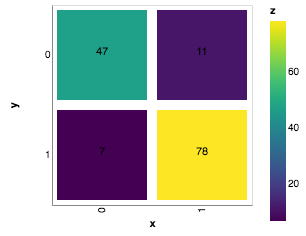

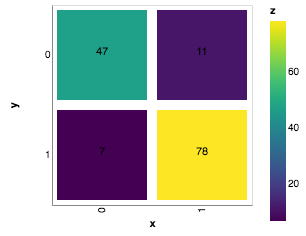

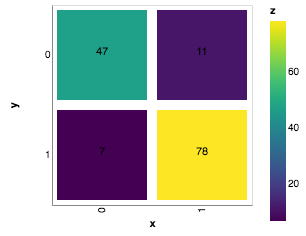

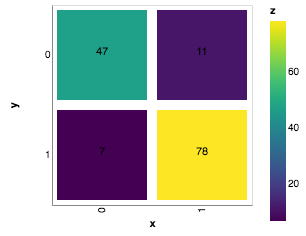

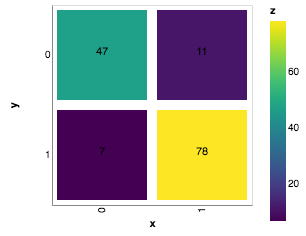

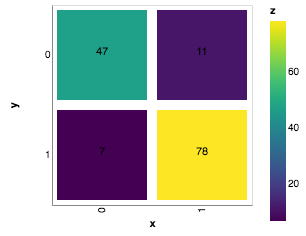

In [17]:
x, y = np.meshgrid(range(0, 2), range(0, 2))
z = xx

# Convert this grid to columnar data expected by Altair
data = pd.DataFrame({'x': x.ravel(),
                     'y': y.ravel(),
                     'z': z.ravel()})

ch1=alt.Chart(data, height=200, width=200).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='z:Q')

ch2=alt.Chart(data, height=200, width=200).mark_text().encode(
    x='x:O',
    y='y:O',
    text='z:Q')

comb = ch1 + ch2
comb.configure_axis(labels=True, ticks=False)